In [172]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [173]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [174]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [175]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [176]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

/var/folders/db/__hp954976g_m54sh0z8650w0000gn/T/ipykernel_14411/2338556962.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [177]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [178]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [179]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [180]:
# Find the most recent date in the data set.
latest_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

Text(0.5, 0, 'Date')

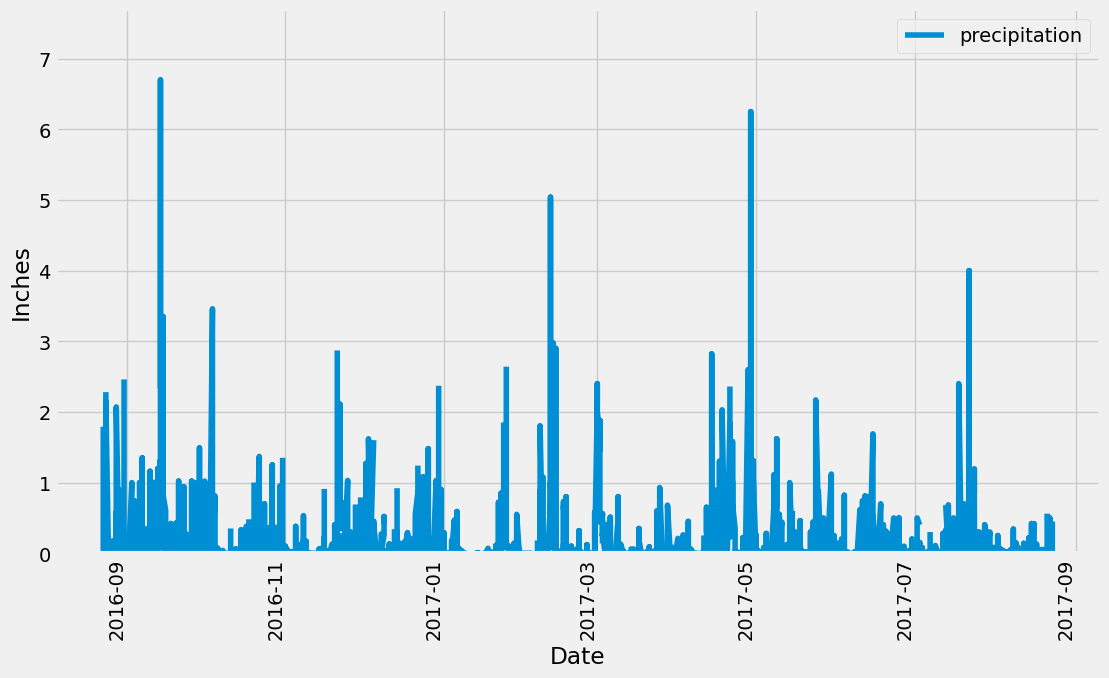

In [181]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.
year_ago =  latest_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
measure_df = pd.DataFrame(query).rename(columns = {'prcp': 'precipitation'})

# Sort the dataframe by date
measure_df['date']= pd.to_datetime(measure_df['date'], format = '%Y-%m-%d')
measure_df = measure_df.set_index('date')
measure_df = measure_df.sort_values(by = ["date"])

# Use Pandas Plotting with Matplotlib to plot the data
measure_df.plot(figsize = (12,8), rot = 90)
plt.legend(loc = 'upper right')
plt.ylim(0,7.7)
plt.ylabel('Inches')
plt.xlabel('Date')

In [182]:
# Use Pandas to calculate the summary statistics for the precipitation data
measure_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [183]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).first().__dict__
session.query(measurement).first().__dict__
x = len(session.query(station).all())
print(f'Number of Stations: {x}')

Number of Stations: 9


In [184]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
ordered_stations = session.query(measurement.station,
                    func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
ordered_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [185]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, 
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs)]
most_active= session.query(*sel).filter_by(station = "USC00519281").all()

print(f"The lowest temperature for {most_active[0][0]} is {most_active[0][1]}")
print(f"The highest temperature for {most_active[0][0]} is {most_active[0][2]}")
print(f"The average temperature for {most_active[0][0]} is {most_active[0][3]}")

The lowest temperature for USC00519281 is 54.0
The highest temperature for USC00519281 is 85.0
The average temperature for USC00519281 is 71.66378066378067


Text(0.5, 0, 'Temperature')

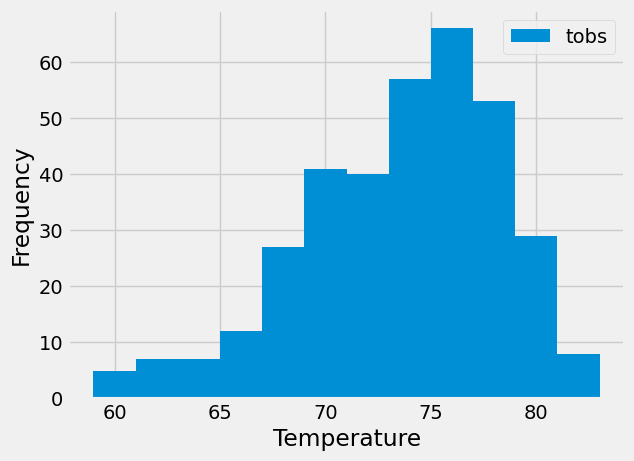

In [186]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12 = session.query(measurement.date, measurement.tobs).filter_by(station = "USC00519281").\
    filter(measurement.date >= year_ago).all()
last_12_df = pd.DataFrame(last_12)
last_12_df.plot(kind = "hist", bins = 12)
plt.xlabel('Temperature')

# Close Session

In [187]:
# Close Session
session.close()